<a href="https://colab.research.google.com/github/Homeash-github/PRODIGY_DS_02/blob/main/Titanic_DB_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv("/content/Titanic.csv")

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
duplicates = data[data.duplicated()]
print("Duplicate rows:")
print(duplicates)

print("Number of duplicate rows:", duplicates.shape[0])

Duplicate rows:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Number of duplicate rows: 0


In [27]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
data_s=data.sort_values(by=['Ticket'],ascending=True)

missing_embarkation_indices = data_s[data_s['Embarked'].isnull()].index
null_embarked_tickets = data_s[data_s['Embarked'].isnull()]['Ticket'].tolist()
print(null_embarked_tickets)
data.loc[missing_embarkation_indices, 'Embarked'] = 'S'
# in this code we are getting the Ticket of Embarked which is null
# and then filling the missing values with

['113572', '113572']


In [29]:
print(data[data['Ticket'] == '113572']['Embarked'])

61     S
829    S
Name: Embarked, dtype: object


In [30]:
import re
def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

data['Title'] = data['Name'].apply(extract_title)

def simplify_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title in ['Ms', 'Mlle', 'Mme']:
        return 'Miss'
    else:
        return 'Other'

data['Title'] = data['Title'].apply(simplify_title)
title_age_mean = data.groupby('Title')['Age'].mean()
def fill_age(row):
    if pd.isnull(row['Age']):
        return title_age_mean[row['Title']]
    return row['Age']

data['Age'] = data.apply(fill_age, axis=1)
print("Average ages by title:")
print(data.groupby('Title')['Age'].mean().round(2))

Average ages by title:
Title
Master     4.57
Miss      21.86
Mr        32.37
Mrs       35.90
Other     45.55
Name: Age, dtype: float64


No. of People survived: 342 out of 891 
Percentage of people survived: 38.38

No. of People not survived: 549 out of 891 
Percentage of people not survived: 61.62



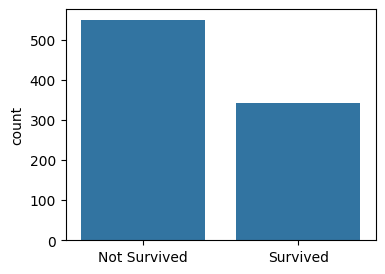

In [31]:
survived = data[data['Survived'] == 1]
not_survived = data[data['Survived'] == 0]
total_ppl = len(survived)+len(not_survived)
percentage_survived = (data[data['Survived'] == 1].shape[0] / data.shape[0]) * 100
percentage_not_survived = (data[data['Survived'] == 0].shape[0] / data.shape[0]) * 100

print("No. of People survived:", len(survived),"out of",total_ppl,"\nPercentage of people survived:", round(percentage_survived,2))
print()
print("No. of People not survived:", len(not_survived),"out of",total_ppl,"\nPercentage of people not survived:", round(percentage_not_survived,2))
print()
plt.figure(figsize=(4, 3))
sns.countplot(x='Survived', data=data)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel(None)
plt.show()


        count
Pclass       
3         491
1         216
2         184



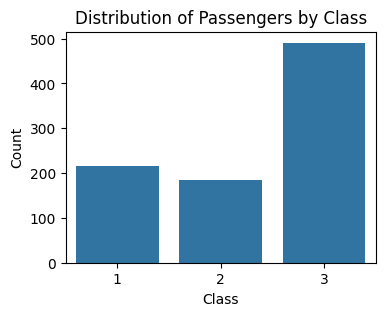

In [32]:
class_counts = data['Pclass'].value_counts()
cdf=pd.DataFrame(class_counts)
print(cdf)
print()
plt.figure(figsize=(4, 3))
sns.countplot(x='Pclass', data=data)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Passengers by Class')
plt.show()

In [33]:
survived_class = data[data['Survived']==1]['Pclass'].value_counts()
not_survived_class = data[data['Survived']==0]['Pclass'].value_counts()
print("Survived by class\n",survived_class)
print("Not Survived by class\n",not_survived_class)

Survived by class
 Pclass
1    136
3    119
2     87
Name: count, dtype: int64
Not Survived by class
 Pclass
3    372
2     97
1     80
Name: count, dtype: int64


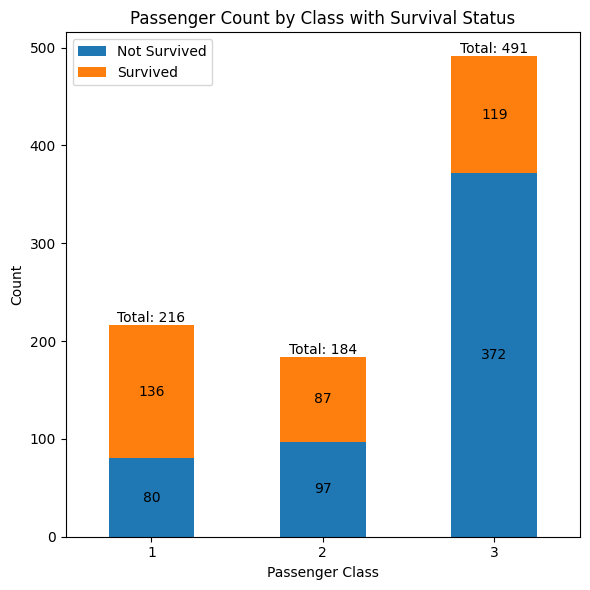

In [34]:
pclass_survival = data.groupby(['Pclass', 'Survived']).size().unstack()
ax = pclass_survival.plot(kind='bar', stacked=True, figsize=(6,6))
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Count')
ax.set_title('Passenger Count by Class with Survival Status')
ax.legend(['Not Survived', 'Survived'])
plt.xticks(rotation=0)
for c in ax.containers:
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

for i, total in enumerate(pclass_survival.sum(axis=1)):
    ax.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#plot to show survived based on Class

In [35]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
not_survived_sex = data[data['Survived']==0]['Sex'].value_counts()
print("Survived:")
print(survived_sex)
print("Not Survived:")
print(not_survived_sex)

Survived:
Sex
female    233
male      109
Name: count, dtype: int64
Not Survived:
Sex
male      468
female     81
Name: count, dtype: int64


In [36]:
survived_percentage_sex = (data[data['Survived'] == 1].groupby('Sex').size() / data.groupby('Sex').size()) * 100
not_survived_percentage_sex = (data[data['Survived'] == 0].groupby('Sex').size() / data.groupby('Sex').size()) * 100

print("Percentage of people survived by sex:")
for sex, percentage in survived_percentage_sex.items():
    print(f"{sex}: {percentage:.2f}%")

print("\nPercentage of people not survived by sex:")
for sex, percentage in not_survived_percentage_sex.items():
    print(f"{sex}: {percentage:.2f}%")


Percentage of people survived by sex:
female: 74.20%
male: 18.89%

Percentage of people not survived by sex:
female: 25.80%
male: 81.11%


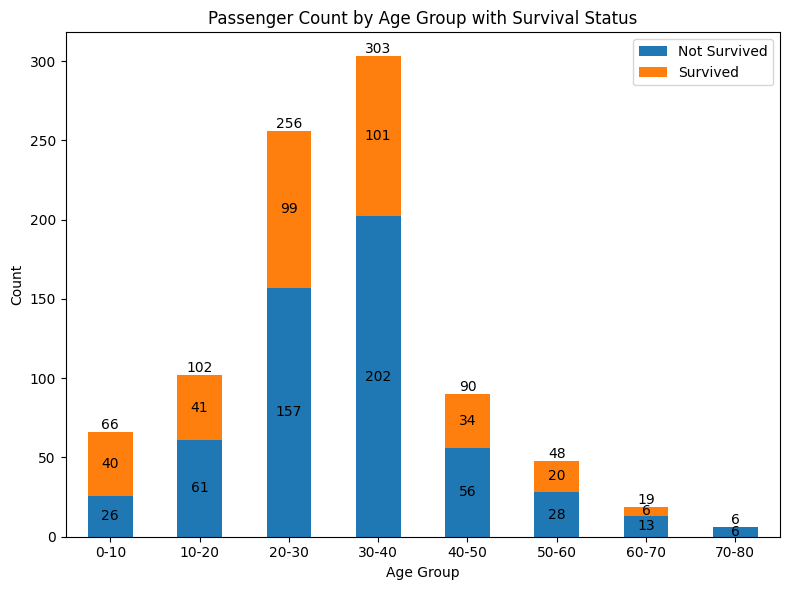

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

age_survival = data.groupby(['AgeGroup', 'Survived']).size().unstack()

ax = age_survival.plot(kind='bar', stacked=True, figsize=(8, 6))

ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Passenger Count by Age Group with Survival Status')
ax.legend(['Not Survived', 'Survived'])

plt.xticks(rotation=0)

for c in ax.containers:

    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

for i, total in enumerate(age_survival.sum(axis=1)):
    ax.text(i, total, f'{total}', ha='center', va='bottom',)

plt.tight_layout()
plt.show()
# this block will plot the survived based on Age Group

In [38]:
data.drop('Cabin', axis=1, inplace=True)
data.isnull().sum()
# One null found in AgeGroup column

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
AgeGroup       1
dtype: int64

In [39]:
missing_AgeGroup_indices = data[data['AgeGroup'].isnull()].index
print(data[data['AgeGroup'].isnull()])
data.loc[missing_AgeGroup_indices, 'AgeGroup'] = '70-80'
#filling the missing values

     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex   Age  SibSp  Parch Ticket  Fare Embarked Title AgeGroup  
630  male  80.0      0      0  27042  30.0        S    Mr      NaN  


In [40]:
data.isnull().sum()
# Now the there is no Null or missing values any of the columns

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
AgeGroup       0
dtype: int64